In [1]:
import torch 
from src.distill_datasets import SimpleDataset
from fairchem.core.common.registry import registry

In [11]:
# force_jac_dataset = SimpleDataset('labels/ac_Ala3_all_gemnet_t_proper/force_jacobians')
# force_jac_dataset = SimpleDataset('labels/ethanol_1k_distributed_test/force_jacobians')
# force_jac_dataset = SimpleDataset('labels/AT_AT_all_gemnet_t_proper/force_jacobians')
force_jac_dataset = SimpleDataset('/data/ericqu/EScAIP_labels/solvated_amino_acids/force_jacobians/')
jac_dataset_2 = SimpleDataset('/data/ishan-amin/hessian_proj_data/labels/SPICE_labels/mace_off_large_SpiceAminos/force_jacobians/')

dataset_path = '/data/ishan-amin/hessian_proj_data/SPICE/spice_separated/Solvated_Amino_Acids/train'
# dataset_path = '/data/shared/MLFF/MD22/95_lmdb/Ac-Ala3-NHMe/train'
# dataset_path = '/data/shared/MLFF/MD22/95_lmdb/AT-AT/train'
# dataset_path = '/data/ishan-amin/post_data/md17/ethanol/1k/train'
config = {"src": dataset_path}
dataset = registry.get_dataset_class("lmdb")(config)
# print(force_jac_dataset[20].reshape(126, 126))

torch.Size([267, 267])


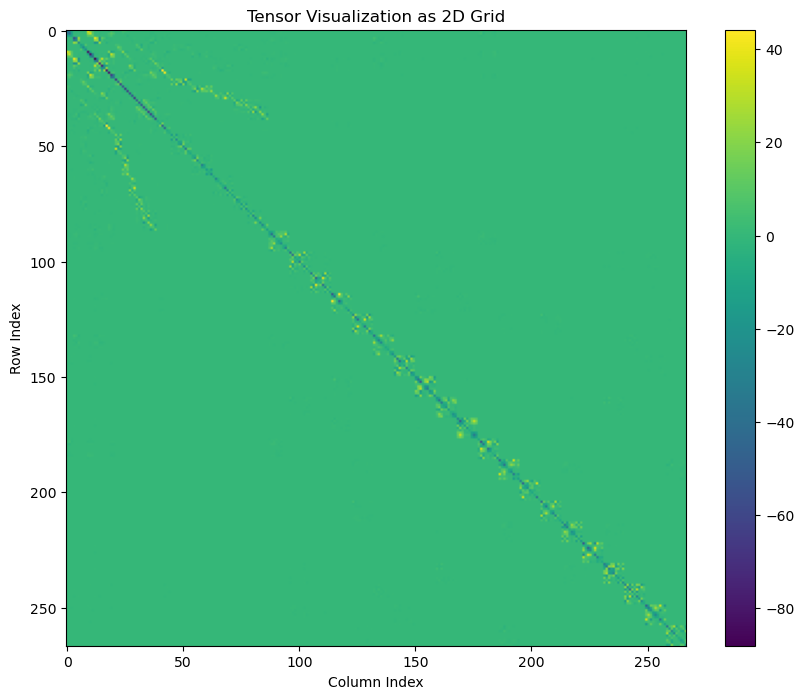

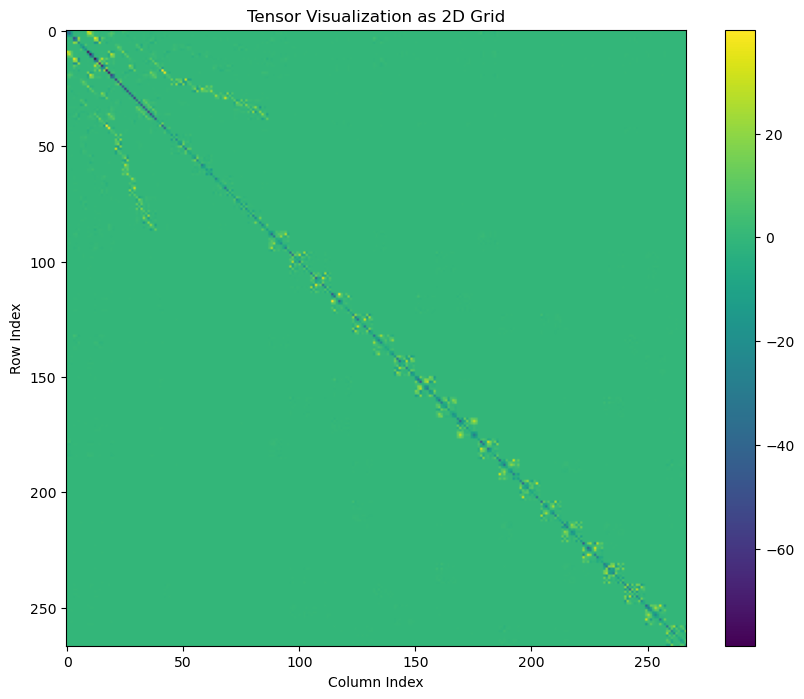

AVERAGE ERROR: 1982.2479248046875
AVERAGE ERROR: 799.713134765625


In [29]:
import numpy as np
import matplotlib.pyplot as plt



# Replace this with actual data if available:
idx = 30
natoms = dataset[idx].natoms
tensor = force_jac_dataset[idx]
tensor = tensor.reshape(3*natoms, 3*natoms)

tensor2 = jac_dataset_2[idx].reshape(3*natoms, 3*natoms)

print(tensor.shape)
# tensor = tensors.std(dim=0)

# tensor = force_jac_dataset[idx].reshape(3*natoms, 3*natoms)


# Visualize the tensor as a 2D grid
plt.figure(figsize=(10, 8))
plt.imshow(tensor * 1.2, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Tensor Visualization as 2D Grid')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(tensor2, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Tensor Visualization as 2D Grid')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()
print(f"AVERAGE ERROR: {(tensor - tensor2).abs().sum()}")
std = 1.0759390592575073
print(f"AVERAGE ERROR: {(tensor*std - tensor2).abs().sum()}")
# plt.figure(figsize=(10, 8))
# plt.imshow(tensor - tensor2, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title('Tensor Visualization as 2D Grid')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# plt.show()

# plt.figure(figsize=(10, 8))
# plt.imshow((tensor + tensor.T)/2 - tensor2, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title('Tensor Visualization as 2D Grid')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# plt.show()





# # Compute eigenvectors and eigenvalues
# eigenvalues, eigenvectors = np.linalg.eig(tensor)
# # Compute singular values
# u, s, vh = np.linalg.svd(tensor)

# # Reconstruct the matrix using the first 5 terms of its low-rank decomposition
# low_rank_approximation = np.zeros_like(tensor)

# for i in range(5):
#     low_rank_approximation += s[i] * np.outer(u[:, i], vh[i, :])

# # Visualize the low-rank approximation
# plt.figure(figsize=(10, 8))
# plt.imshow(low_rank_approximation, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title('Low-Rank Approximation (First 5 Terms)')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# plt.show()





# # Visualize the eigenvalues (as a bar plot for simplicity)
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(eigenvalues)), np.sort(eigenvalues), color='blue')
# plt.title('Eigenvalues')
# plt.xlabel('Index')
# plt.ylabel('Eigenvalue')
# plt.show()


# # Visualize singular values (as a bar plot for simplicity)
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(s)), s, color='green')
# plt.title('Singular Values')
# plt.xlabel('Index')
# plt.ylabel('Singular Value')
# plt.show()

# # Visualizing the first eigenvector as an example
# plt.figure(figsize=(10, 6))
# plt.plot(eigenvectors[:, 0], color='red')
# plt.title('First Eigenvector')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.show()
